<a href="https://colab.research.google.com/github/MouseLand/cellpose/blob/main/notebooks/run_cellpose3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running cellpose3 in colab with a GPU

<font size = 4>Cellpose3 now allows you to restore and segment noisy/blurry/low res images!

For more details on Cellpose3 check out the [paper](https://www.biorxiv.org/content/10.1101/2024.02.10.579780v1).

Mount your google drive to access all your image files. This also ensures that the segmentations are saved to your google drive.

## Installation

Install cellpose -- by default the torch GPU version is installed in COLAB notebook.

In [ ]:
!pip install "opencv-python-headless<4.3"
!pip install cellpose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.3.1 requires opencv-python-headless>=4.1.1, but you have opencv-python-headless 3.4.18.65 which is incompatible.
qudida 0.0.4 requires opencv-python-headless>=4.0.1, but you have opencv-python-headless 3.4.18.65 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 13.2 MB/s eta 0:00:00


Check CUDA version and that GPU is working in cellpose and import other libraries.

In [ ]:
!nvcc --version
!nvidia-smi

import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from cellpose import core, utils, io, models, metrics
from glob import glob

use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Sat Feb 24 16:35:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  7

## Images

Load in your own data or use ours (below)

(464, 500)


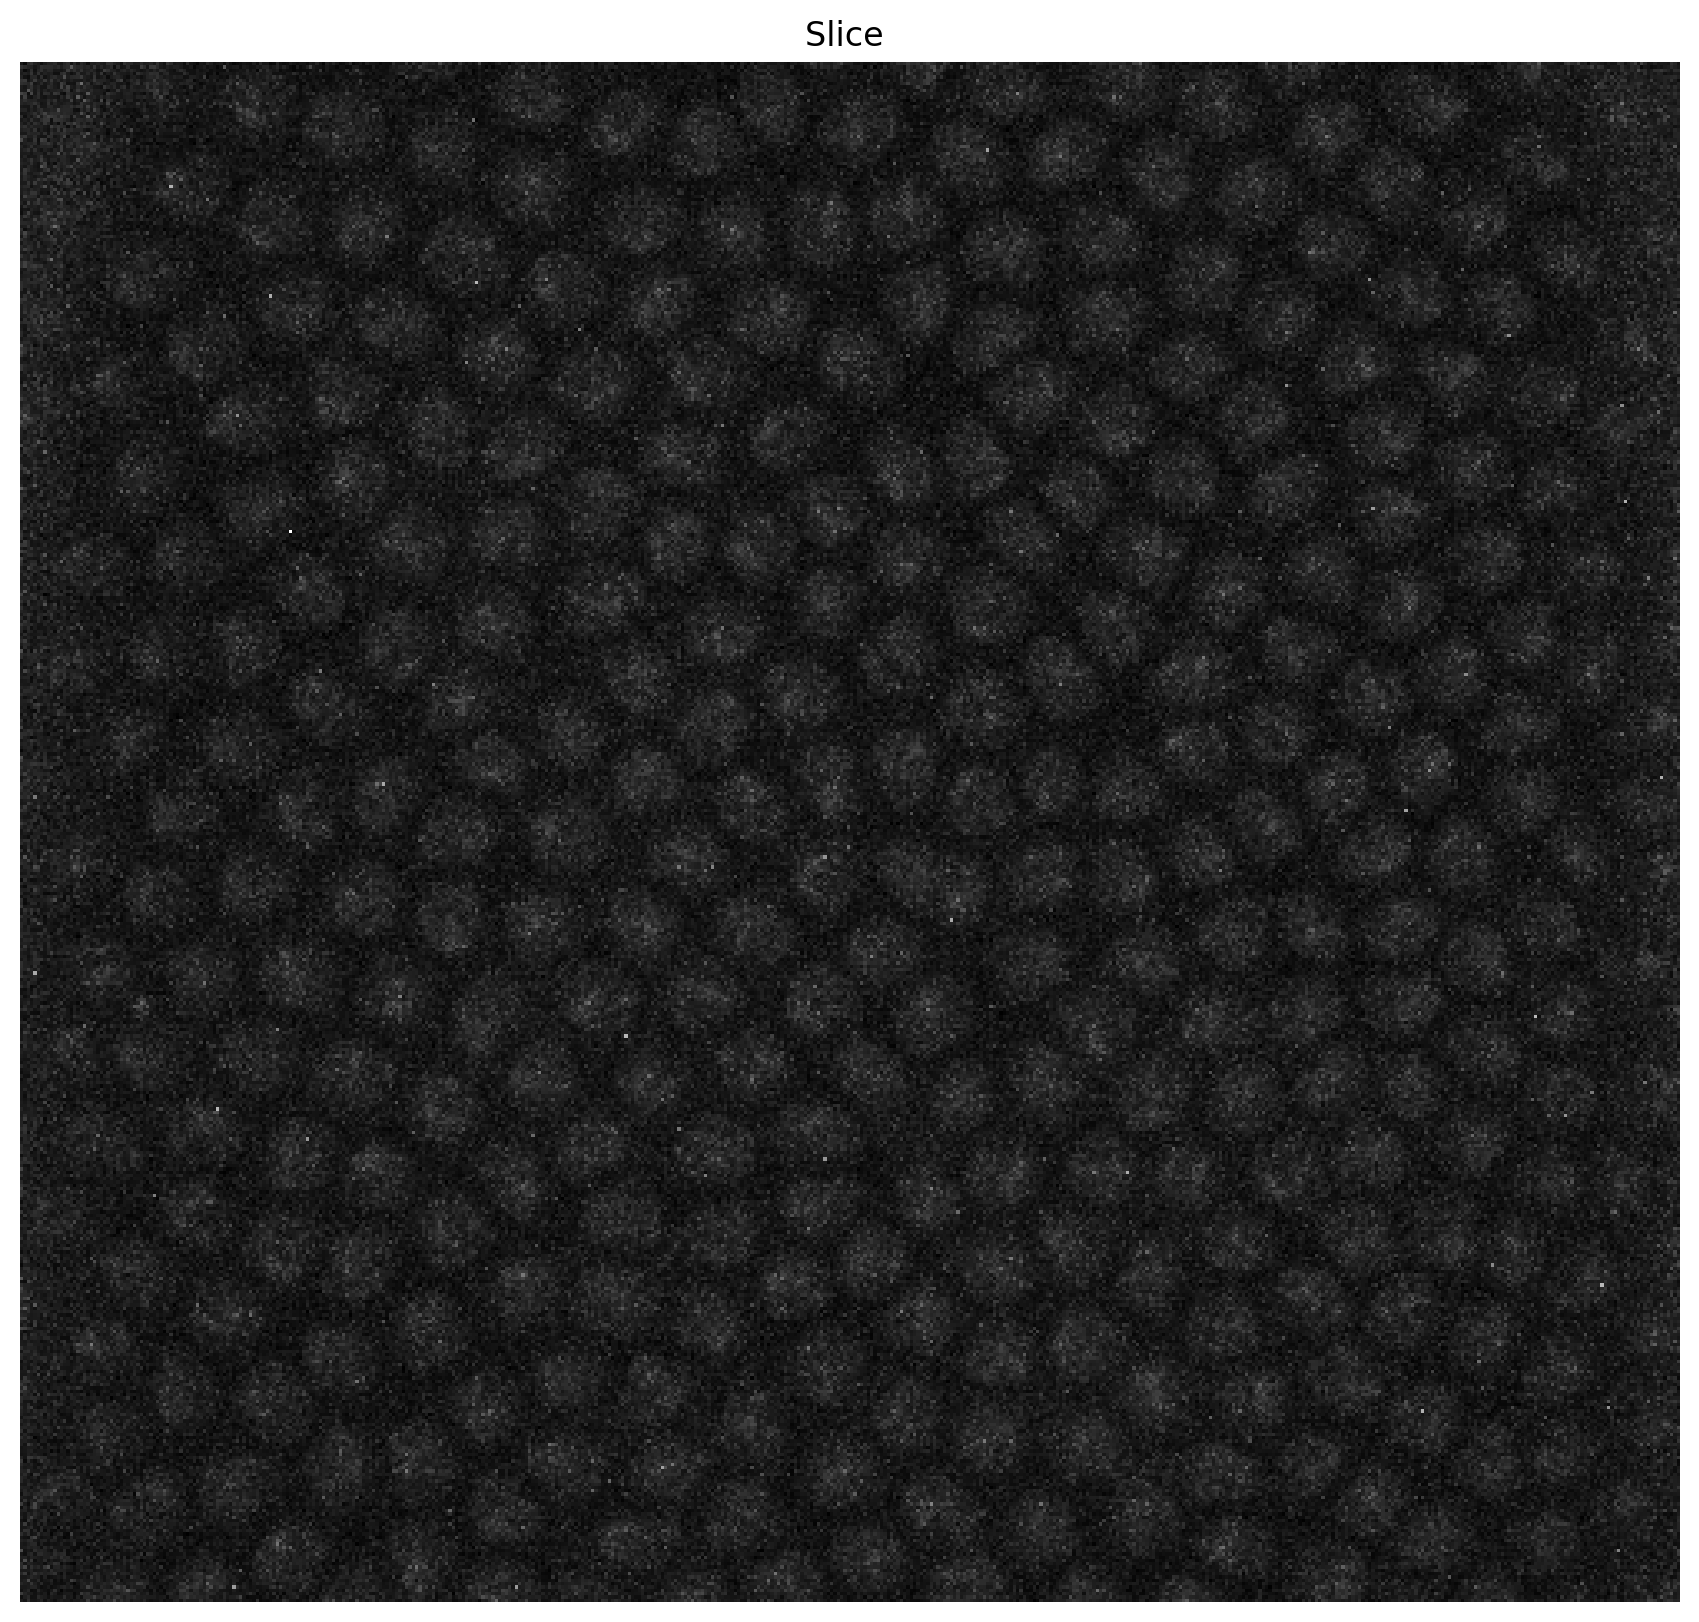

In [8]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
import tifffile

# %matplotlib inline
mpl.rcParams['figure.dpi'] = 200
from cellpose import utils, io

# download noisy images from website
# url = "http://www.cellpose.org/static/data/test_poisson.npz"
filename = "notebooks/Test_images/BFP_60.tif"
# utils.download_url_to_file(url, filename)
# dat = np.load(filename, allow_pickle=True)
img = tifffile.imread(filename)
print(img.shape)


plt.figure(figsize=(20, 10))
plt.imshow(img, cmap="gray")
plt.title(f"Slice ")
plt.axis("off")

plt.show()

Mount your google drive here if you want to load your own images:

In [ ]:

#@markdown ###Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')


## run denoising and segmentation

In [9]:
# RUN CELLPOSE3

from cellpose import denoise, io

io.logger_setup() # run this to get printing of progress

# DEFINE CELLPOSE MODEL
# model_type="cyto3" or "nuclei", or other model
# restore_type: "denoise_cyto3", "deblur_cyto3", "upsample_cyto3", "denoise_nuclei", "deblur_nuclei", "upsample_nuclei"
model = denoise.CellposeDenoiseModel(gpu=True, model_type="cyto3",
                                     restore_type="denoise_cyto3")

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus
# OR if you have different types of channels in each image
# channels = [[2,3], [0,0], [0,0]]

# if you have a nuclear channel, you can use the nuclei restore model on the nuclear channel with
# model = denoise.CellposeDenoiseModel(..., chan2_restore=True)

# NEED TO SPECIFY DIAMETER OF OBJECTS
# in this case we have them from the ground-truth masks
# diams = dat["diam_test"]

masks, flows, styles, imgs_dn = model.eval([img], diameter=2, channels=[0,0])


creating new log file
2025-02-20 23:37:36,459 [INFO] WRITING LOG OUTPUT TO C:\Users\bobei\.cellpose\run.log
2025-02-20 23:37:36,459 [INFO] 
cellpose version: 	3.1.0 
platform:       	win32 
python version: 	3.10.4 
torch version:  	2.6.0+cpu
2025-02-20 23:37:36,459 [INFO] Downloading: "https://www.cellpose.org/models/denoise_cyto3" to C:\Users\bobei\.cellpose\models\denoise_cyto3



100%|██████████| 25.3M/25.3M [00:01<00:00, 22.4MB/s]

2025-02-20 23:37:37,757 [INFO] >> denoise_cyto3 << model set to be used


2025-02-20 23:37:38,735 [INFO] Neither TORCH CUDA nor MPS version not installed/working.
2025-02-20 23:37:38,735 [INFO] >>>> using CPU
2025-02-20 23:37:38,742 [INFO] >>>> using CPU
2025-02-20 23:37:38,995 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-02-20 23:37:38,995 [INFO] >> cyto3 << model set to be used
2025-02-20 23:37:38,999 [INFO] Neither TORCH CUDA nor MPS version not installed/working.
2025-02-20 23:37:38,999 [INFO] >>>> using CPU
2025-02-20 23:37:38,999 [INFO] >>>> using CPU
2025-02-20 23:37:39,125 [INFO] >>>> loading model C:\Users\bobei\.cellpose\models\cyto3
2025-02-20 23:37:39,651 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


plot results

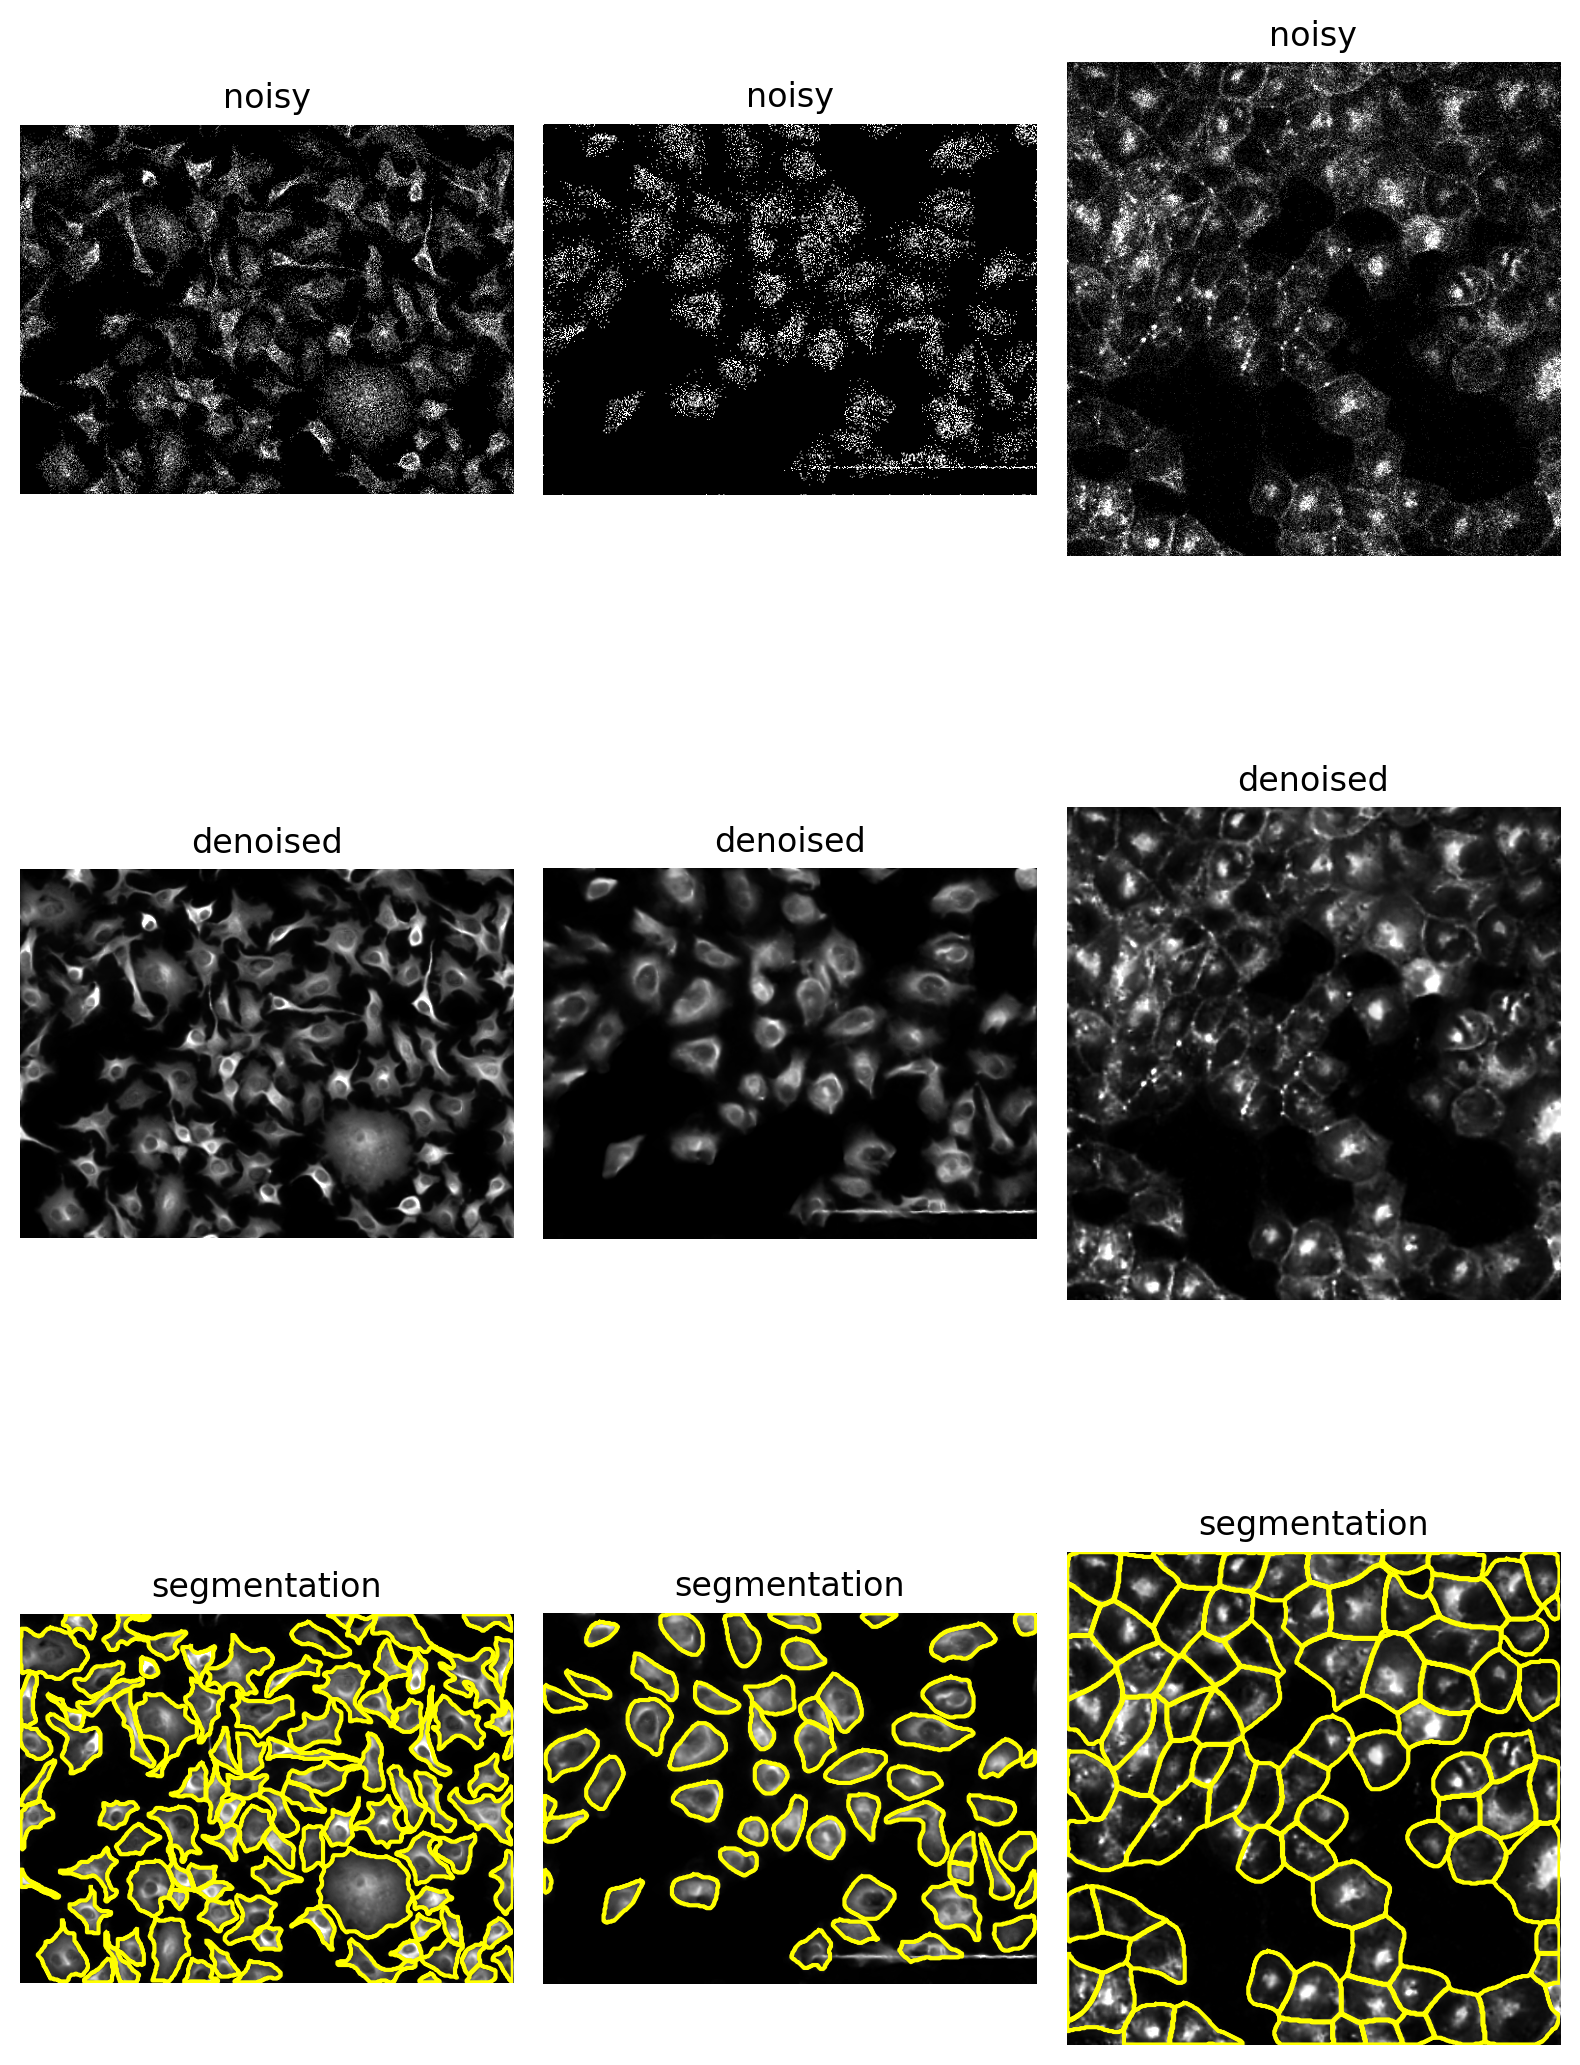

In [ ]:
plt.figure(figsize=(8,12))
for i, iex in enumerate([2, 18, 20]):
    img = imgs[iex].squeeze()
    plt.subplot(3,3,1+i)
    plt.imshow(img, cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
    plt.title("noisy")

    img_dn = imgs_dn[iex].squeeze()
    plt.subplot(3,3,4+i)
    plt.imshow(img_dn, cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
    plt.title("denoised")

    plt.subplot(3,3,7+i)
    plt.imshow(img_dn, cmap="gray", vmin=0, vmax=1)
    outlines = utils.outlines_list(masks[iex])
    for o in outlines:
        plt.plot(o[:,0], o[:,1], color=[1,1,0])
    plt.axis('off')
    plt.title("segmentation")

plt.tight_layout()
plt.show()